<a href="https://colab.research.google.com/github/vivekchowdary123/CODSOFT/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.simplefilter('ignore')

In [2]:
ds = pd.read_csv('IRIS.csv')
ds_points=ds.iloc[:,1:4]
labels=ds.iloc[:,4]

In [3]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
print("Target Labels",ds["species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Data Visualizations

In [8]:
ds['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

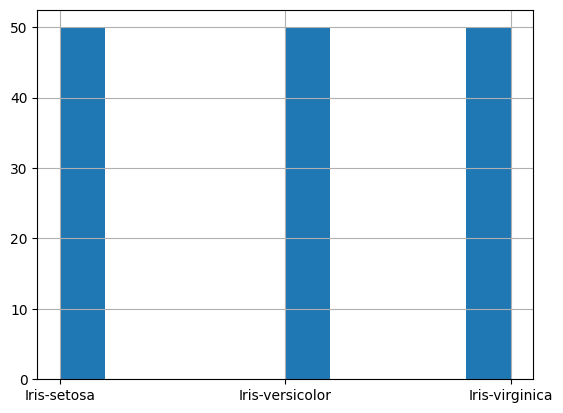

In [9]:
ds['species'].hist()

In [10]:
import plotly.express as px
fig=px.scatter(ds,x="sepal_length",y="sepal_width",color="species")
fig.show()

In [11]:
x_train,x_test,y_train,y_test=train_test_split(ds_points,labels,test_size=0.2)

In [12]:
Standard_obj=StandardScaler()
Standard_obj.fit(x_train)
x_train_std=Standard_obj.transform(x_train)
x_test_std=Standard_obj.transform(x_test)

# Model

In [13]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=0,gamma=.10,C=1.0)
svm.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std,y_test)*100))

Training data accuracy 97.50
Testing data accuracy 96.67


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,p=2,metric='minkowski')
knn.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format(knn.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format(knn.score(x_test_std,y_test)*100))

Training data accuracy 97.50
Testing data accuracy 96.67


In [15]:
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train_std,y_train)
print('Training data accuracy {:.2f}'.format(decision_tree.score(x_train_std,y_train)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(x_test_std,y_test)*100))

Training data accuracy 100.00
Testing data accuracy 93.33


In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train_std, y_train)

print('Training data accuracy {:.2f}'.format(random_forest.score(x_train_std, y_train) * 100))
print('Testing data accuracy {:.2f}'.format(random_forest.score(x_test_std, y_test) * 100))

Training data accuracy 100.00
Testing data accuracy 96.67


In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [19]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 96.67


Accuracy of model is 96.67